![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 004 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 08/09/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0004Part002.ipynb)

In [263]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_s_curve, make_swiss_roll

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [264]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [265]:
# Constants

DATA_FILE_URL   = r'None'
DATA_FILE_NAME  = r'None'

TOTAL_RUN_TIME = 30 #<! Don't touch it!


In [266]:
# Auxiliary Functions

def GetData(MakeData: Callable, Nx: int, Ny: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    mX, vCx = MakeData(Nx)
    mY, vCy = MakeData(Ny)
    
    return mX, mY, vCx, vCy

def PlotTrainTestData(mX: np.ndarray, mY: np.ndarray, vCx: np.ndarray, vCy: np.ndarray, hA: plt.Axes, Is3DData: bool = False) -> None:
    m = mX.min()
    M = mX.max()
    
    hA.scatter(*mX.T, s = 25, c = vCx, edgecolor = 'k', alpha = 1, label = 'Train', vmin = vCx.min(), vmax = vCx.max())
    hA.scatter(*mY.T, s = 100, c = 'r', marker = '*', alpha = 1, label = 'Test')
    hA.set_xlim([m, M])
    hA.set_ylim([m, M])
    if Is3DData:
        hA.set_zlim([m, M])
    hA.set_xlabel('$x_1$')
    hA.set_ylabel('$x_2$')
    if Is3DData:
        hA.set_zlabel('$x_3$')
    hA.legend()

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported above use **the dedicated cell**.  
   Comment what do you need the package for and the version needed.
 - If you need functions from previous notebook copy them into a file called `AuxFun.py`.  
   Import the function in the dedicated cell.
 - Submission in groups (Single submission per group).
 - The submission files should have the format: `<fileName>_GRP_<#>`.  
   For instance, `Exercise001Part002_GRP_A.ipynb` or `AuxFun_GRP_A.py`.
 - You may and _should_ use the forums for questions.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [267]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 30 [Sec]


* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.

## Team Members

- `<Ilan><Schaedel><011708005>`.
- `<Barak><Ben Menachem><312527229>`.
- `<Rotem><Weissman><203958103>`.

In [268]:
# Students Packages to Import
# If you need a package not listed above, use this cell
# Do not use `pip install` in the submitted notebook



## Generate / Load Data

In [269]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 7. MDS

### 7.1. Classic MDS Algorithm

In this section we'll implement a SciKit Learn API compatible class for the Classic MDS.  

The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set ($\boldsymbol{D}_{xx}$) builds the encoder.  
3. `transform()` - Applies the encoding on the input data ($\boldsymbol{D}_{xy}$) in out of sample manner.  
4. `fix_transform()` - Given a data set ($\boldsymbol{D}_{xx}$) builds the encoder and applies the encoding.  

* <font color='brown'>(**#**)</font> Pay attention to data structure (`Nx x Nx` / `Nx x Ny`).
* <font color='brown'>(**#**)</font> Do not use any loops in you implementation.

In [270]:
class CMDS():
    def __init__(self, d: int = 2):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.mEigenvalues = None
        self.mEigenvectors = None
        self.mDxx = None
        #===============================================================#
        
    def fit(self, mDxx: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mDxx - Input data (Distance matrix) with shape Nx x Nx.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the model encoder.

        centered_mDxx = mDxx - mDxx.mean(axis=1).reshape(-1,1) # center columns
        centered_mDxx -= centered_mDxx.mean(axis=0).reshape(1,-1) # center rows

        mK = -0.5 * centered_mDxx

        vEigenvalues, mEigenvectors = sp.sparse.linalg.eigsh(mK, k=self.d, which='LM', return_eigenvectors=True)

        sorted_indices = np.argsort(vEigenvalues)[::-1]
        self.mEigenvalues = np.diag(vEigenvalues[sorted_indices])
        
        self.mEigenvectors = mEigenvectors[:,sorted_indices]
        self.mDxx = mDxx


        #===============================================================# 
        return self
    
    def transform(self, mDxy: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding.
        Args:
            mDxy - Input data (Distance matrix) with shape Nx x Ny.
        Output:
            mZ - Low dimensional representation (embeddings) with shape Ny x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.
        centered_mDxy = mDxy - self.mDxx.mean(axis=1).reshape(-1,1) # center columns
        centered_mDxy -= centered_mDxy.mean(axis=0).reshape(1,-1) # center rows

        mKxy = -0.5 * centered_mDxy

        mZ = np.linalg.inv(np.sqrt(self.mEigenvalues)) @ self.mEigenvectors.T @ mKxy
        
        #===============================================================#

        return mZ.T
    
    def fit_transform(self, mDxx: np.ndarray) -> np.ndarray:
        '''
        Applies encoding on the input.
        Args:
            mDxx - Input data (Distance matrix) with shape Nx x Nx.
        Output:
            mZ - Low dimensional representation (embeddings) with shape Nx x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.

        self.fit(mDxx)
        mZ = np.sqrt(self.mEigenvalues) @ self.mEigenvectors.T
        #===============================================================#

        return mZ.T


* <font color='red'>(**?**)</font> Will `fit()` and then `transform()` will match the result of `fit_transform()`?  
  Make sure you understand this before proceeding.

### 7.2. Metric MDS Algorithm

In this section we'll implement a SciKit Learn API compatible class for the Metric MDS.  
The implementation will assume the distance matrix is generated using the _Eculidean_ distance (**Not _Squared Euclidean_**).  
The solver will use the Majorization Minimization algorithm.

The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set ($\boldsymbol{D}_{xx}$) initializes the data structures.  
3. `fit_transform()` - Given a data set ($\boldsymbol{D}_{xx}$) builds the encoder and applies the encoding.  

* <font color='brown'>(**#**)</font> Pay attention to data structure (`Nx x Nx` / `Nx x Ny`).
* <font color='brown'>(**#**)</font> Do not use any loops in you implementation beside the main MM loop.
* <font color='brown'>(**#**)</font> Think about the difference in `transform()` and `fit_transform()` compared to `CMDS()` above.

In [271]:
class MMDS():
    def __init__(self, d: int = 2, maxIter = 500, ε = 1e-6):
        '''
        Constructing the object.
        Args:
            d       - Number of dimensions of the encoder output.
            maxIter - Maximum number of iterations for the Majorization Minimization.
            ε       - Convergence threshold.
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.maxIter = maxIter
        self.epsilon = ϵ
        self.mC = None

        #===============================================================#
        
    def fit(self, mDxx: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mDxx - Input data (Distance matrix) with shape Nx x Nx.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the model encoder.

        self.mC = - mDxx * (np.ones_like(mDxx) - np.eye(mDxx.shape[0]))
        
        #===============================================================# 
        return self
    
    def fit_transform(self, mDxx: np.ndarray) -> np.ndarray:
        '''
        Applies encoding on input data.
        Args:
            mDxx - Input data (Distance matrix) with shape Nx x Nx.
        Output:
            mZ - Low dimensional representation (embeddings) with shape Nx x d.
        '''
        #===========================Fill This===========================#
        # 1. Apply the `fit()` method.
        # 2. Applies the Majorization Minimization.
        # 3. Encode data using the model encoder.
        # !! Use no loops beside the main loop (`maxIter`).
        
        self.fit(mDxx)
        N = mDxx.shape[0]
        current_obj = np.inf
        mC = self.mC.copy()

        mZ = np.random.uniform(low = mDxx.min(), high = mDxx.max(), size = (self.d,N))

        for i in range(self.maxIter):

            Dz = sp.spatial.distance.cdist(mZ.T, mZ.T)

            obj = np.linalg.norm(mDxx - Dz)
            
            if abs(obj - current_obj) < self.epsilon:
                break
            else:
                current_obj = obj

            mC[Dz!=0] = self.mC[Dz!=0] / Dz[Dz!=0]

            mB = mC - np.diag(mC.sum(axis=1))

            mZ = (1/N) * (mZ @ mB)

        mZ = mZ.T

        #===============================================================#

        return mZ


* <font color='red'>(**?**)</font> Why is the `transform()` method not asked to be implemented?  
  Make sure you understand this before proceeding.

### 7.3. Apply MDS on Data

In this section the MDS (Using the above classes) will be applied on several data sets:

 * Swiss Roll - Generated using `make_swiss_roll()`.
 * S Curve - Generated using `make_s_curve()`.

For each data set:

1. Plot the Data Set  
   Plot the Data set in 3D.  
   **This is implemented**.
2. Calculate the Distance Matrix  
   Calculate the distance matrix of the training data (`mX1`, `mX2`).  
   For _Classic MDS_ use the _Squared Euclidean_ distance.  
   For _Metric MDS_ use the _Euclidean_ distance.
3. Apply the MDS  
   On each data set, apply both the _Metric MDS_ and _Classic MDS_.  
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to `vCx1` and `vCx2`.  
   Use `d = 2`.

* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be 2 figures for each data set. You may show them in a single plot using sub plots.

In [272]:
# Generate Data

Nx = 1000 #<! Train Data
Ny = 10 #<! Test Data (Out of Sample)

mX1, mY1, vCx1, vCy1 = GetData(make_s_curve, Nx, Ny)
mX2, mY2, vCx2, vCy2 = GetData(make_swiss_roll, Nx, Ny)

# Centering Data
vμX1 = np.mean(mX1, axis = 0)
vμX2 = np.mean(mX2, axis = 0)

mX1 -= np.reshape(vμX1, (1, -1))
mY1 -= np.reshape(vμX1, (1, -1))
mX2 -= np.reshape(vμX2, (1, -1))
mY2 -= np.reshape(vμX2, (1, -1))

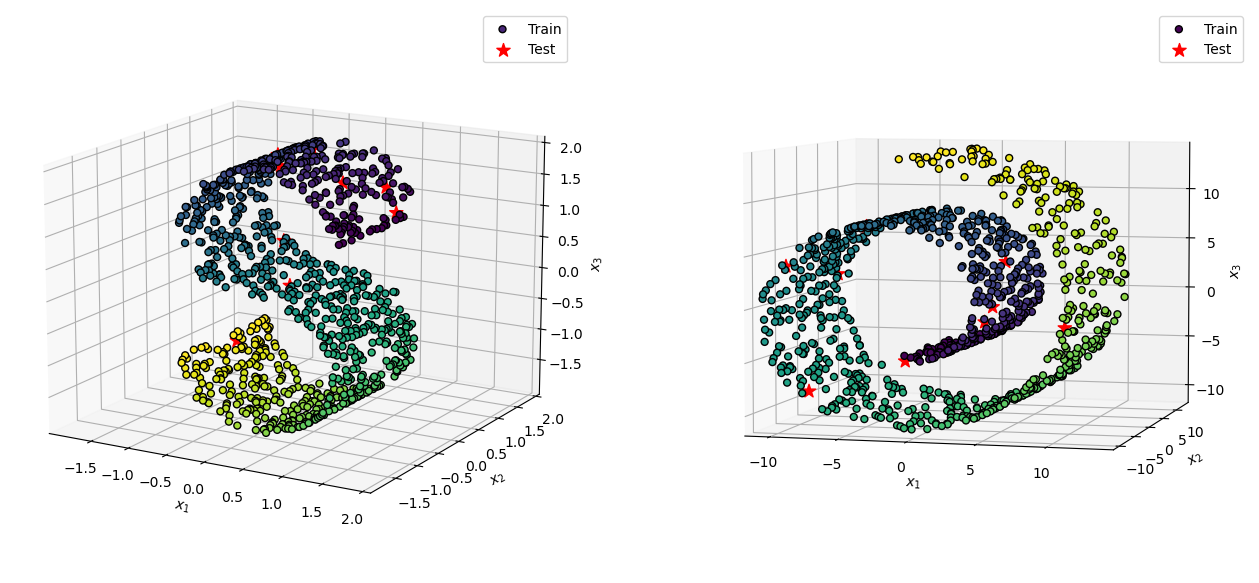

In [273]:
# Plot Data
# Pay attention how to display the train (Out of Sample) data

hF = plt.figure(figsize = (16, 8))
hA1 = hF.add_subplot(1, 2, 1, projection = '3d')
hA2 = hF.add_subplot(1, 2, 2, projection = '3d')
hA1.view_init(elev = 15, azim = 300)
hA2.view_init(elev = 5, azim = 285)

PlotTrainTestData(mX1, mY1, vCx1, vCy1, hA1, Is3DData = True)
PlotTrainTestData(mX2, mY2, vCx2, vCy2, hA2, Is3DData = True)

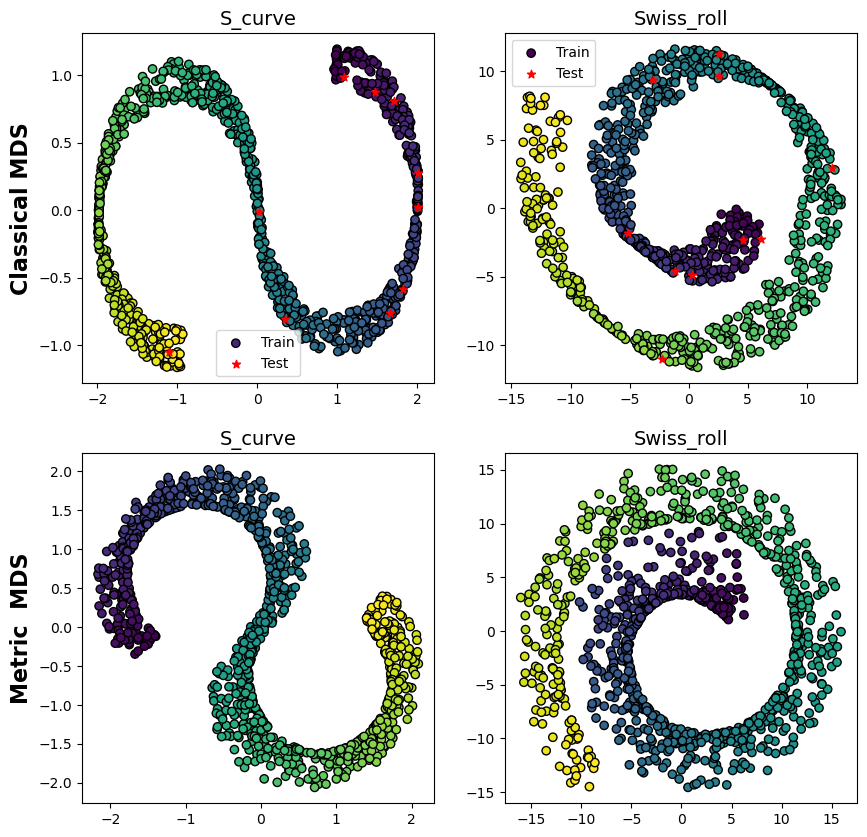

In [274]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Calculate the distance matrices of the training data per data set.  
# 3. Apply Classic MDS and Metric MDS to each data set.
# 4. Display results as scattered data.
# !! The output should be a figure of 2 x 2 (Row: Method, Column: Data Set).

# Set d
d = 2

# Calculate distances matrices
mDxx_s_curve_train = sp.spatial.distance.cdist(mX1, mX1, metric="euclidean")
mDxy_s_curve_test = sp.spatial.distance.cdist(mX1, mY1, metric="euclidean")

mDxx_swiss_roll_train = sp.spatial.distance.cdist(mX2, mX2, metric="euclidean")
mDxy_swiss_roll_test = sp.spatial.distance.cdist(mX2, mY2, metric="euclidean")

# Classical MDS
CMDS_s_curve = CMDS(d=d)
mZ_cmds_s_curve_train = CMDS_s_curve.fit_transform(mDxx_s_curve_train**2)
mZ_cmds_s_curve_test = CMDS_s_curve.fit(mDxx_s_curve_train**2).transform(mDxy_s_curve_test**2)

CMDS_swiss_roll = CMDS(d=d)
mZ_cmds_swiss_roll_train = CMDS_swiss_roll.fit_transform(mDxx_swiss_roll_train**2)
mZ_cmds_swiss_roll_test = CMDS_swiss_roll.fit(mDxx_swiss_roll_train**2).transform(mDxy_swiss_roll_test**2)

# Metric MDS
MMDS_s_curve = MMDS(d=d)
mZ_mmds_s_curve_train = MMDS_s_curve.fit_transform(mDxx_s_curve_train)

MMDS_swiss_roll = MMDS(d=d)
mZ_mmds_swiss_roll_train = MMDS_swiss_roll.fit_transform(mDxx_swiss_roll_train)

# Display results
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].set_ylabel(f'Classical MDS', fontsize=16,fontweight="bold")
axes[0,0].set_title(f'S_curve', fontsize=14, ha="center" )
axes[0,0].scatter(mZ_cmds_s_curve_train[:,0], mZ_cmds_s_curve_train[:,1] , c = vCx1 , edgecolor = 'k' , label = 'Train' )
axes[0,0].scatter(mZ_cmds_s_curve_test[:,0], mZ_cmds_s_curve_test[:,1] , c = 'r' , marker = '*' , label = 'Test' )
axes[0,0].legend()

axes[0,1].set_title(f'Swiss_roll', fontsize=14, ha="center" )
axes[0,1].scatter(mZ_cmds_swiss_roll_train[:,0], mZ_cmds_swiss_roll_train[:,1] , c = vCx2 , edgecolor = 'k' , label = 'Train' )
axes[0,1].scatter(mZ_cmds_swiss_roll_test[:,0], mZ_cmds_swiss_roll_test[:,1] , c = 'r' , marker = '*' , label = 'Test' )
axes[0,1].legend()

axes[1,0].set_ylabel(f'Metric  MDS', fontsize=16,fontweight="bold")
axes[1,0].set_title(f'S_curve', fontsize=14, ha="center" )
axes[1,0].scatter(mZ_mmds_s_curve_train[:,0], mZ_mmds_s_curve_train[:,1] , c = vCx1 , edgecolor = 'k' , label = 'Train' )

axes[1,1].set_title(f'Swiss_roll', fontsize=14, ha="center" )
axes[1,1].scatter(mZ_mmds_swiss_roll_train[:,0], mZ_mmds_swiss_roll_train[:,1] , c = vCx2 , edgecolor = 'k' , label = 'Train' )

plt.show()

#===============================================================#

### 7.4. Question

1. Explain the differences / similarities between results.
2. Describe the distance function which should be used for such data.
3. What results would you expect if the distance for the Metric MDS was the _Squared Euclidean_?  
   Assume the optimal solder for this distance.

### 7.4. Solution

1. The difference between classical MDS to metric MDS is that classical MDS aims to preserve the similarities of the points in the higher domain while metric MDS aim to preseve the distances.
    Also, MMDS uses a loss function, with performance dependent on the maximum iteration number allowed and the minimum corvergence tolerance ($\epsilon$), while CMDS uses a closed form solution.
2. Similar to what we saw in exercise 3, the best distance function for this data would be a geodesic distance.
3. We can run MMDS on the data with squared euclidean distance and see that the results will be very similar to the classical MDS since they will both try to minimize the same objective function.


---

### 7.5. Out of Sample Extension

In this section the _out of sample extension_ of the _Classic MDS_ (Using the above class) will be applied.  
In this section the calculation of the out of sample extension will be done without using the test data samples (`mX1`, `mX2`)!

For `mY1` and `mY2`:

1. Calculate the Distance Matrix  
   Calculate `Dxy1` and `Dxy2` **without using `mX1` and `mX2`**.  
   You may use `Dxx1` and `Dxx2` in any way suitable.   
   For _Classic MDS_ use the _Squared Euclidean_ distance.  
   For _Metric MDS_ use the _Euclidean_ distance.
3. Apply the Out of Sample Extension for Classic MDS  
   On each data set, apply the Classic MDS in _out of sample extension_ mode on `mDxy1` and `mDxy2`. 
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to `vCx1`, `vCx2`.   
   You should plot both the training data and the test data.
   Use `d = 2`.

* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> You may use the knowledge about the dimensions of `mX1`, `mX2`.
* <font color='brown'>(**#**)</font> In case one fails on (1) one may calculate `mDxy` using `mX` (Points will be reduced).
* <font color='brown'>(**#**)</font> The output should be 2 figures for each data set. You may show them in a single plot using sub plots.

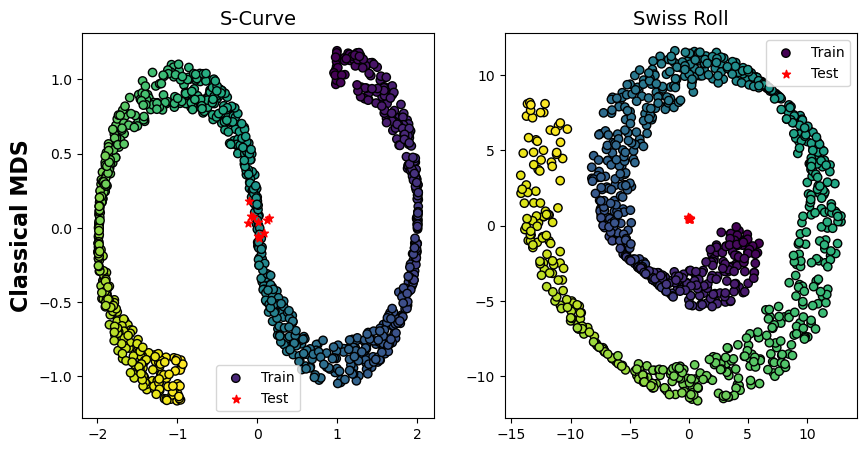

In [277]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Calculate the distance matrices of the test data per data set from `mDxx1` and `mDxx2`.  
# 3. Apply Classic MDS to each data set.  
#    Apply `fit()` then `transform()` on `mDxx1` and `mDxx2`.  
#    Apply `transform()` on `mDxy1` and `mDxy2`.
# 4. Display results as scattered data.
#    Display both the train and test data on the same axes (See above).
# !! The output should be a figure of 1 x 2 (Row: Method, Column: Data Set).
# !! Hint: You should recover the data from `mDxx`.

d = 2

def Dxy_reconstruction(mDxx, mY, d):
    CMDS_result = CMDS(d=d)
    mZ = CMDS_result.fit_transform(mDxx)
    return sp.spatial.distance.cdist(mZ, mY, metric="euclidean")

mDxx1 = mDxx_s_curve_train
mDxx2 = mDxx_swiss_roll_train

mDxy1 = Dxy_reconstruction(mDxx1, mY1, mX1.shape[1])
mDxy2 = Dxy_reconstruction(mDxx2, mY2, mX2.shape[1])

# Both mX1 and mX2 was already fitted in the previous part with mDxx1 and mDxx2 respectedly
cmds1 = CMDS_s_curve
mZ1 = cmds1.transform(mDxy1)

cmds2 = CMDS_swiss_roll
mZ2 = cmds2.transform(mDxy2)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_ylabel('Classical MDS', fontsize=16,fontweight="bold")
axes[0].set_title('S-Curve', fontsize=14, ha="center")
axes[0].scatter(mZ_cmds_s_curve_train[:,0], mZ_cmds_s_curve_train[:,1], c=vCx1, edgecolor='k', label='Train')
axes[0].scatter(mZ1[:,0], mZ1[:,1] , c = 'r' , marker = '*' , label = 'Test')
axes[0].legend()

axes[1].set_title('Swiss Roll', fontsize=14, ha="center")
axes[1].scatter(mZ_cmds_swiss_roll_train[:,0], mZ_cmds_swiss_roll_train[:,1], c=vCx2, edgecolor='k', label='Train')
axes[1].scatter(mZ2[:,0], mZ2[:,1] , c = 'r' , marker = '*' , label = 'Test')
axes[1].legend()

plt.show()


### 7.6. Question

Are the results above good?  
Will they match the results if one would calculate `mDxy` from `mX` and `mY`?  
What can be done to overcome those issues without accessing `mX` and `mY` directly?  

### 7.6. Solution

As expected, the results are very bad. This is due to the fact that the encoding only reflect the original data up to rotation and shifting, so the distances we calculated from mX to mY are not at all similar to the true distances we could calculate from mX and mY.



---

In [276]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 9.628973245620728 [Sec].
